In [1]:
!pip install textract

### importing libraries

In [1]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
import re
import numpy as np
import os
import textract as tr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score as ac
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Extracting data from the resumes

In [2]:
file_path = r"C:/Users/gokul/OneDrive/Documents/excelr/project/p2/data/Resumes"
extracted_data = []
software_names = []
def extract_data(file_path):
    for file in os.listdir(file_path):
        if file == 'reactjs_developer':
            final = os.path.join(file_path, file)
            for data in os.listdir(final):
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'Peoplesoft_resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                if data.endswith('.docx') :
                    final_path = os.path.join(final, data)
                    extracted_data.append((tr.process(final_path)).decode('utf-8'))
                    software_names.append(file)
        elif file == 'SQL_Developer_Lightning _insight' :
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)
        elif file == 'workday_resumes':
            final = os.path.join(file_path, file)
            for data in os.listdir(final) :
                final_path = os.path.join(final, data)
                extracted_data.append((tr.process(final_path)).decode('utf-8'))
                software_names.append(file)

In [3]:
extract_data(file_path)

In [4]:
len(extracted_data)

79

In [5]:
data = pd.DataFrame()
data['resumes'] = extracted_data
data['category'] = software_names

In [6]:
data.head()

,resumes,category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft_resumes
1,G. Ananda Rayudu \n\n\t\t https://www.li...,Peoplesoft_resumes
2,PeopleSoft Database Administrator\n\n ...,Peoplesoft_resumes
3,Classification: Internal\n\nClassification: In...,Peoplesoft_resumes
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",Peoplesoft_resumes


In [7]:
data.isnull().sum()

resumes     0
category    0
dtype: int64

## Preprocessings and eda

In [8]:
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
data['resumes']=data.resumes.apply(lambda x: preprocess(x))

In [10]:
data.head()

,resumes,category
0,anubhav kumar singh core competencies scriptin...,Peoplesoft_resumes
1,ananda rayudu profile summary years experience...,Peoplesoft_resumes
2,peoplesoft database administrator gangareddy p...,Peoplesoft_resumes
3,classification internal classification interna...,Peoplesoft_resumes
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft_resumes


Data Exploration

Now its time to explore the preprocessed and cleaned text reviews. Textual data can be explored using Word Clouds. These are visual representations of the frequency of different words present in text. Importance of words are represented by size of the word. Bigger size represents more frequently occuring words.

In [11]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


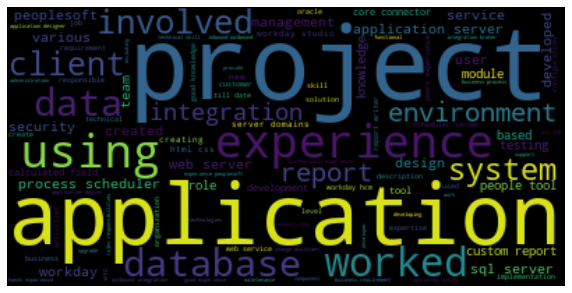

In [12]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
print ("Displaying the distinct categories of resume:\n\n ")
print (data['category'].unique())

Displaying the distinct categories of resume:

 
['Peoplesoft_resumes' 'reactjs_developer'
 'SQL_Developer_Lightning _insight' 'workday_resumes']


In [14]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (data['category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


reactjs_developer                   24
workday_resumes                     21
Peoplesoft_resumes                  20
SQL_Developer_Lightning _insight    14
Name: category, dtype: int64


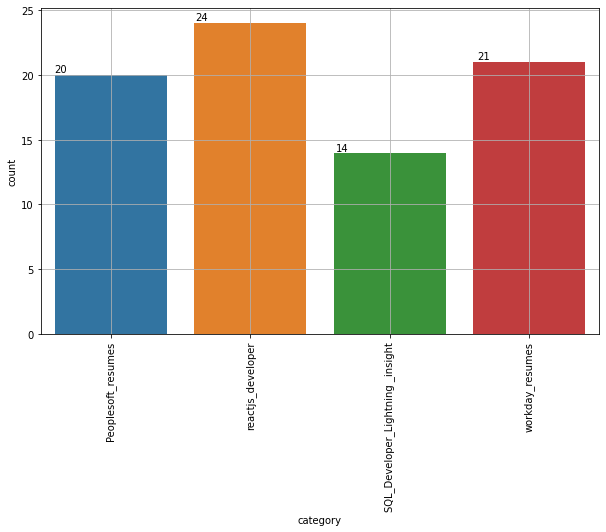

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
ax=sns.countplot(x="category", data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

from this count plot we can understand that there are 4 job categories and within that most of the resumes are from reactjs devolopers
and less number of resumes from sql developers

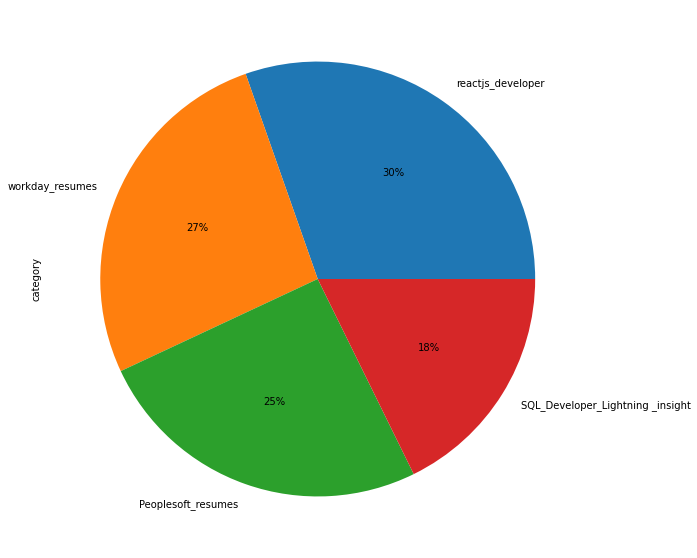

In [16]:
plt.figure(figsize=(20,10))
data['category'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

from this pie chart we can understand that there are 4 job categories and we can understand their counts as percentage

C:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


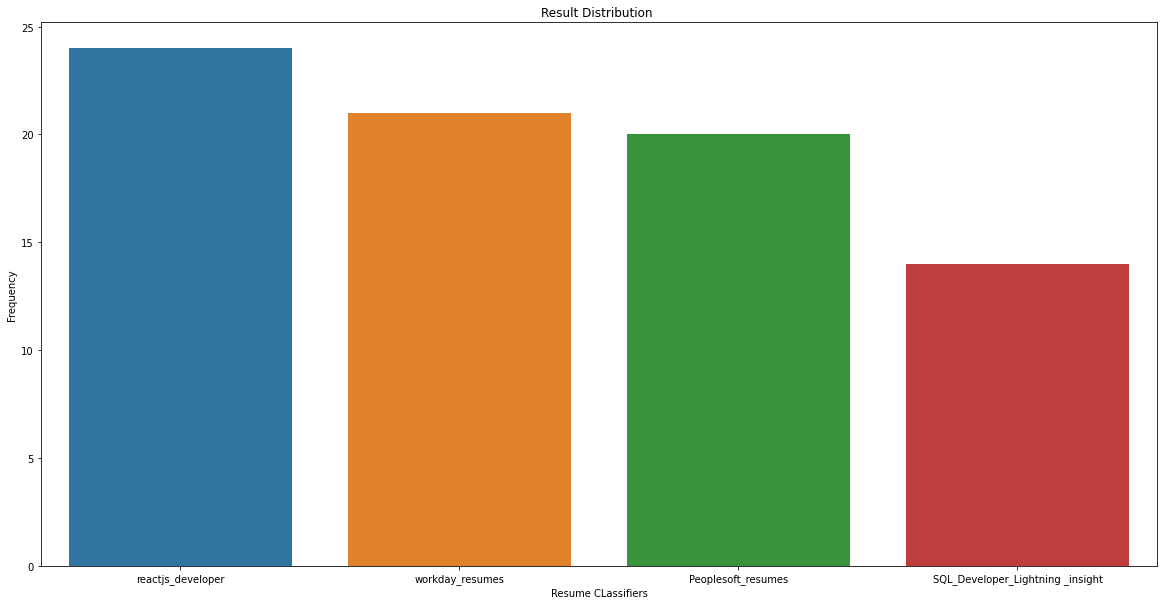

In [17]:
from six import text_type
x=data['category'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x.index,x.values)
plt.title('Result Distribution ')
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Resume CLassifiers', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

from this bar plot we can undestand the counts from top to bottom where reactjs devolopers comes top and sql devolopers comes at least

In [18]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [19]:
data['category'].value_counts()

2    24
3    21
0    20
1    14
Name: category, dtype: int64

In [21]:

requiredText = data['resumes'].values
requiredTarget = data['category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
tfidf=word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(63, 4348)
(16, 4348)


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score

Naive bayes classifier

In [23]:

clf = MultinomialNB()
NB=clf.fit(x_train,y_train)
prediction1=NB.predict(x_test)
prediction2=NB.predict(x_train)
print("ACCURACY OF THE MODEL ON TRAIN DATA: ", accuracy_score(y_train, prediction2))
print(classification_report(y_train, prediction2))
print(confusion_matrix(y_train, prediction2))
print("ACCURACY OF THE MODEL ON TEST DATA: ", accuracy_score(y_test, prediction1))
print(classification_report(y_test, prediction1))
print(confusion_matrix(y_test, prediction1))

ACCURACY OF THE MODEL ON TRAIN DATA:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL ON TEST DATA:  0.875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         5
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.83      0.82        16
weighted avg       0.92      0.88      

LOGISTIC REGRESSION 

In [24]:
lr = LogisticRegression()
LOG=lr.fit(x_train,y_train)
prediction3=LOG.predict(x_test)
prediction4=LOG.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction4))
print(classification_report(y_train, prediction4))
print(confusion_matrix(y_train, prediction4))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction3))
print(classification_report(y_test, prediction3))
print(confusion_matrix(y_test, prediction3))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94     

DecisionTreeClassifier

In [25]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')

print(clf)
DTree=clf.fit(x_train,y_train)
prediction5=DTree.predict(x_test)
prediction6=DTree.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction6))
print(classification_report(y_train, prediction6))
print(confusion_matrix(y_train, prediction6))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction5))
print(classification_report(y_test, prediction5))
print(confusion_matrix(y_test, prediction5))

DecisionTreeClassifier(max_depth=20)
ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
w

RandomForest classifier

In [26]:

modelr= RandomForestClassifier( )
modelr.fit(x_train,y_train)
prediction7=modelr.predict(x_test)
prediction8=modelr.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction8))
print(classification_report(y_train, prediction8))
print(confusion_matrix(y_train, prediction8))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction7))
print(classification_report(y_test, prediction7))
print(confusion_matrix(y_test, prediction7))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.

AdaBoostClassifier

In [27]:

from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=20 ,learning_rate=0.01)
 

AB=ad.fit(x_train,y_train)
prediction9=AB.predict(x_test)
prediction10=AB.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction10))
print(classification_report(y_train, prediction10))
print(confusion_matrix(y_train, prediction10))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction9))
print(classification_report(y_test, prediction9))
print(confusion_matrix(y_test, prediction9))

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.

GradientBoostingClassifier

In [28]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=20 ,learning_rate=0.01)

 
GB=clf.fit(x_train,y_train)
prediction11=GB.predict(x_test)
prediction12=GB.predict(x_train)
print("ACCURACY OF THE MODEL on train data: ", accuracy_score(y_train, prediction12))
print(classification_report(y_train, prediction12))
print(confusion_matrix(y_train, prediction12))
print("ACCURACY OF THE MODEL on test data: ", accuracy_score(y_test, prediction11))
print(classification_report(y_test, prediction11))
print(confusion_matrix(y_test, prediction11))
 

ACCURACY OF THE MODEL on train data:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        17

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[16  0  0  0]
 [ 0 11  0  0]
 [ 0  0 19  0]
 [ 0  0  0 17]]
ACCURACY OF THE MODEL on test data:  0.9375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.67      0.80         3
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94     

# FINAL MODEL -RandomForest model saving


we are getting randomforest classification model as the best model with all kind of classification metrices
so we are saving that model for deployment

In [29]:
from pickle import dump
from pickle import load

In [30]:
dump(modelr, open('Randomforest.sav','wb'))

In [31]:
loaded_model=load(open('Randomforest.sav','rb'))
result=classification_report(y_test, prediction7)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [32]:
import pickle

pickle.dump(tfidf, open("tfidf.pkl", "wb"))